# E-Commerce Customer Churn Prediction


#### Project Workflow
1. Understand the Dataset
- Review all columns and their meanings (you’ve already done this — great start!)
- Identify which variables are:
- Independent (features)
- Dependent (target)

2. Clean and Prepare the Data
- Check for missing values or anomalies (e.g., nulls sales)
- Create new features if needed:

3. Explore the Data (EDA)
Use visualizations to uncover patterns:
- 📉 Boxplots to see sales distribution by weather or promotion
- 📌 Correlation heatmap to see which features influence sales most

4. Model Sales Drivers
- Use regression models (e.g., Linear Regression, Random Forest, XGBoost) to predict daily_sales
- Evaluate feature importance: which variables drive sales the most?
- Try time series models (e.g., ARIMA, Prophet) if you're forecasting future sales

7. Present Your Work
- Deploy your project with streamlit
- Summarize key insights in a slide deck or report
- Include visuals, trends, and actionable takeaways


In [1]:
# Importing Libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [2]:
# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)


In [3]:
# Load Dataset
df = pd.read_csv('ecommerce_customer_churn_dataset.csv')

raw_df = df.copy()

## Data Cleaning

In [4]:
df.head()

,Age,Gender,Country,City,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,Total_Purchases,Average_Order_Value,Days_Since_Last_Purchase,Discount_Usage_Rate,Returns_Rate,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned,Signup_Quarter
0,43.0,Male,France,Marseille,2.9,14.0,27.4,6.0,50.6,3.0,9.0,94.72,34.0,46.40,2.0,17.9,9.0,4.0,16.3,20.8,1.0,953.33,2278.0,0,Q1
1,36.0,Male,UK,Manchester,1.6,15.0,42.7,10.3,37.7,1.0,19.5,82.45,71.0,57.96,9.2,42.8,7.0,3.0,NaN,23.3,3.0,1067.47,3028.0,0,Q4
2,45.0,Female,Canada,Vancouver,2.9,10.0,24.8,1.6,70.9,1.0,9.1,165.52,11.0,12.24,11.5,0.0,4.0,1.0,NaN,8.8,NaN,1289.75,2317.0,0,Q4
3,56.0,Female,USA,New York,2.6,10.0,38.4,14.8,41.7,9.0,15.0,147.33,47.0,44.10,5.4,41.4,2.0,5.0,85.9,31.0,3.0,2340.92,2674.0,0,Q1
4,35.0,Male,India,Delhi,3.1,29.0,51.4,NaN,19.1,9.0,32.5,141.30,73.0,25.20,5.5,37.9,1.0,11.0,83.0,50.4,4.0,3041.29,5354.0,0,Q4


In [5]:
df.tail()

,Age,Gender,Country,City,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,Total_Purchases,Average_Order_Value,Days_Since_Last_Purchase,Discount_Usage_Rate,Returns_Rate,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned,Signup_Quarter
49995,38.0,Female,USA,Los Angeles,10.0,10.0,35.8,8.8,51.2,3.0,13.0,156.76,18.0,62.7,NaN,9.2,5.0,1.0,20.7,25.2,1.0,2365.98,3499.0,0,Q2
49996,37.0,Male,USA,Chicago,1.4,21.0,32.4,9.6,32.5,2.0,15.0,103.31,48.0,66.3,NaN,17.6,5.0,3.0,38.6,12.1,4.0,1293.60,3154.0,0,Q3
49997,44.0,Female,USA,Phoenix,2.8,19.0,40.3,10.4,50.6,1.0,12.0,139.44,7.0,NaN,10.7,25.2,4.0,6.0,59.9,NaN,1.0,1655.28,1622.0,0,Q1
49998,41.0,Female,USA,Chicago,2.9,17.0,29.9,10.1,60.8,1.0,12.0,111.58,72.0,74.2,2.5,34.6,5.0,2.0,NaN,14.1,3.0,1286.11,2634.0,0,Q2
49999,56.0,Male,UK,Leeds,2.2,2.0,18.2,NaN,46.0,0.0,9.0,132.67,37.0,2.9,3.5,0.0,7.0,0.0,0.0,4.2,1.0,1072.61,612.0,0,Q3


In [6]:
df.sample(10)

,Age,Gender,Country,City,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,Total_Purchases,Average_Order_Value,Days_Since_Last_Purchase,Discount_Usage_Rate,Returns_Rate,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned,Signup_Quarter
21755,30.0,Female,Australia,Adelaide,3.0,7.0,NaN,7.5,80.2,2.0,14.0,135.44,3.0,27.9,10.4,19.4,7.0,4.0,34.9,14.3,5.0,2210.63,NaN,1,Q1
39689,49.0,Female,Germany,Cologne,1.4,18.0,21.5,10.3,48.3,6.0,11.0,75.75,45.0,19.9,6.5,1.4,7.0,1.0,27.6,12.9,1.0,972.28,1117.0,0,Q2
13525,46.0,Male,USA,Los Angeles,3.0,11.0,27.2,10.3,59.9,4.0,15.0,152.74,24.0,32.1,7.0,0.0,6.0,3.0,25.9,16.5,3.0,1869.11,NaN,0,Q2
30830,54.0,Female,France,Paris,4.0,6.0,18.6,6.2,47.2,1.0,10.0,183.47,55.0,45.7,11.9,NaN,6.0,0.0,NaN,11.8,1.0,2011.11,92.0,1,Q3
10097,41.0,Male,France,Marseille,4.5,19.0,31.9,14.3,39.3,8.0,17.0,185.83,15.0,33.9,8.3,37.6,7.0,9.0,42.2,NaN,3.0,3461.67,1419.0,1,Q2
47647,37.0,Male,USA,New York,0.2,20.0,32.5,9.5,51.6,4.0,12.0,77.04,11.0,26.8,NaN,34.3,9.0,2.0,61.9,21.3,1.0,1104.73,1327.0,0,Q3
34602,34.0,Female,Canada,Montreal,0.7,14.0,32.8,9.3,58.5,4.0,13.0,143.40,5.0,35.9,2.0,26.0,6.0,7.0,16.3,NaN,2.0,1501.12,2050.0,0,Q2
4030,48.0,Female,Canada,Calgary,10.0,7.0,23.6,3.8,61.5,3.0,13.0,141.74,1.0,52.2,3.7,12.0,8.0,2.0,25.7,19.1,NaN,1850.50,2128.0,0,Q2
24586,36.0,Female,Australia,Sydney,1.0,6.0,18.2,4.7,53.6,2.0,9.0,103.59,4.0,12.4,10.7,0.0,6.0,NaN,18.4,12.7,5.0,880.41,1485.0,0,Q1
16783,45.0,Female,Australia,Melbourne,1.6,20.0,15.9,10.6,92.5,3.0,15.6,167.64,38.0,51.6,4.6,19.4,6.0,0.0,4.5,9.3,2.0,1719.48,2418.0,1,Q4


In [7]:
print("Dataset Information:")
print("="*70)
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            47505 non-null  float64
 1   Gender                         50000 non-null  object 
 2   Country                        50000 non-null  object 
 3   City                           50000 non-null  object 
 4   Membership_Years               50000 non-null  float64
 5   Login_Frequency                50000 non-null  float64
 6   Session_Duration_Avg           46601 non-null  float64
 7   Pages_Per_Session              47000 non-null  float64
 8   Cart_Abandonment_Rate          50000 non-null  float64
 9   Wishlist_Items                 46000 non-null  float64
 10  Total_Purchases                50000 non-null  float64
 11  Average_Order_Value            50000 non-null  float64
 12  Days_Since_Last_Purchase 

In [8]:
# Column names
print(f"\nTotal columns: {len(df.columns)}")
print("\nColumn names:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")



Total columns: 25

Column names:
 1. Age
 2. Gender
 3. Country
 4. City
 5. Membership_Years
 6. Login_Frequency
 7. Session_Duration_Avg
 8. Pages_Per_Session
 9. Cart_Abandonment_Rate
10. Wishlist_Items
11. Total_Purchases
12. Average_Order_Value
13. Days_Since_Last_Purchase
14. Discount_Usage_Rate
15. Returns_Rate
16. Email_Open_Rate
17. Customer_Service_Calls
18. Product_Reviews_Written
19. Social_Media_Engagement_Score
20. Mobile_App_Usage
21. Payment_Method_Diversity
22. Lifetime_Value
23. Credit_Balance
24. Churned
25. Signup_Quarter


In [9]:
# Count of each data type
print("Data types distribution:")
print(df.dtypes.value_counts())

Data types distribution:
float64    20
object      4
int64       1
Name: count, dtype: int64


In [10]:
df.describe()

,Age,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,Total_Purchases,Average_Order_Value,Days_Since_Last_Purchase,Discount_Usage_Rate,Returns_Rate,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned
count,47505.000000,50000.000000,50000.000000,46601.000000,47000.000000,50000.000000,46000.000000,50000.000000,50000.000000,47000.000000,46500.000000,45509.000000,47472.000000,49832.000000,46500.000000,44000.000000,45000.000000,47500.000000,50000.000000,44500.000000,50000.000000
mean,37.802968,2.984009,11.624660,27.660754,8.737811,57.079973,4.298391,13.111576,123.117330,29.792872,41.997485,6.680913,20.937980,5.681831,2.853312,29.364466,19.371607,2.353874,1440.626292,1966.233258,0.289000
std,11.834668,2.059105,7.810657,10.871013,3.778220,16.282723,3.189754,7.017312,175.569714,29.695062,21.373642,6.143027,14.252561,2.676052,2.328948,20.574021,9.419252,1.110012,907.249443,1225.072166,0.453302
min,5.000000,0.100000,0.000000,1.000000,1.000000,0.000000,0.000000,-13.000000,26.380000,0.000000,0.240000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,29.000000,1.400000,6.000000,19.700000,6.000000,46.400000,2.000000,8.000000,87.050000,9.000000,25.300000,2.900000,9.900000,4.000000,1.000000,13.200000,12.500000,2.000000,789.817500,1049.000000,0.000000
50%,38.000000,2.500000,11.000000,26.800000,8.400000,58.100000,4.000000,12.000000,112.970000,21.000000,40.200000,5.400000,19.700000,5.000000,2.000000,27.600000,18.600000,2.000000,1243.415000,1896.000000,0.000000
75%,46.000000,4.000000,17.000000,34.700000,11.200000,68.700000,6.000000,17.000000,144.440000,41.000000,57.000000,9.100000,30.400000,7.000000,4.000000,43.100000,25.500000,3.000000,1874.000000,2791.000000,1.000000
max,200.000000,10.000000,46.000000,75.600000,24.100000,143.743350,28.000000,128.700000,9666.379178,287.000000,116.640000,99.615734,91.700000,21.000000,21.000000,100.000000,61.900000,5.000000,8987.240000,7197.000000,1.000000


In [11]:
# Check for Duplicates 
df.duplicated().sum()

if df.duplicated().sum() > 0:
    print("Duplicate Rows:")
    display(df[df.duplicated()])
else:
    print("No duplicate rows found.")

No duplicate rows found.


In [12]:
# Check for Columns with Missing Values
df.isnull().sum()[df.isnull().sum() > 0]

Age                              2495
Session_Duration_Avg             3399
Pages_Per_Session                3000
Wishlist_Items                   4000
Days_Since_Last_Purchase         3000
Discount_Usage_Rate              3500
Returns_Rate                     4491
Email_Open_Rate                  2528
Customer_Service_Calls            168
Product_Reviews_Written          3500
Social_Media_Engagement_Score    6000
Mobile_App_Usage                 5000
Payment_Method_Diversity         2500
Credit_Balance                   5500
dtype: int64

### Handle Missing Values

In [13]:
# Create working copy
df_cleaned = df.copy()

In [14]:
# Separate column types
numerical_cols = df_cleaned.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns.tolist()

if 'Churned' in numerical_cols:
    numerical_cols.remove('Churned')

In [15]:
# Fill missing numerical colums with median
for col in numerical_cols:
    if df_cleaned[col].isnull().sum() > 0:
        df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)
           
# Fill missing categorical colums with mode
for col in categorical_cols:
    if df_cleaned[col].isnull().sum() > 0:
        df_cleaned[col].fillna(df_cleaned[col].mode()[0], inplace=True)


C:\Users\odebi\AppData\Local\Temp\ipykernel_13792\3795788519.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)


In [16]:
# Verify
print(f"\nRemaining missing values: {df_cleaned.isnull().sum().sum()}")


Remaining missing values: 0


In [17]:
print(f"\nCleaning Summary:")
print(f"Original: {df.shape}")
print(f"Cleaned:  {df_cleaned.shape}")
print(f"Rows removed: {df.shape[0] - df_cleaned.shape[0]}")
print("\n✅ Data cleaning complete!")



Cleaning Summary:
Original: (50000, 25)
Cleaned:  (50000, 25)
Rows removed: 0

✅ Data cleaning complete!


# EXPLORATORY DATA ANALYSIS (EDA)

- Target distribution - Check class imbalance
- Correlations - Which features matter most for churn
- Key visualizations - Only the important ones (correlation matrix, boxplots)
- Categorical analysis - Churn rates by category
- Summary - Key takeaways

Explain the thought process for using median and mode filling the missing numerical and categorical data rspectively in data cleaning

### Target Variable Distribution

In [18]:
# Check churn distribution
churn_counts = df_cleaned['Churned'].value_counts()
churn_pct = df_cleaned['Churned'].value_counts(normalize=True) * 100

print("Churn Distribution:")
print(f"Active (0):  {churn_counts[0]:,} ({churn_pct[0]:.2f}%)")
print(f"Churned (1): {churn_counts[1]:,} ({churn_pct[1]:.2f}%)")
print(f"Imbalance ratio: {churn_counts[0]/churn_counts[1]:.2f}:1")


Churn Distribution:
Active (0):  35,550 (71.10%)
Churned (1): 14,450 (28.90%)
Imbalance ratio: 2.46:1


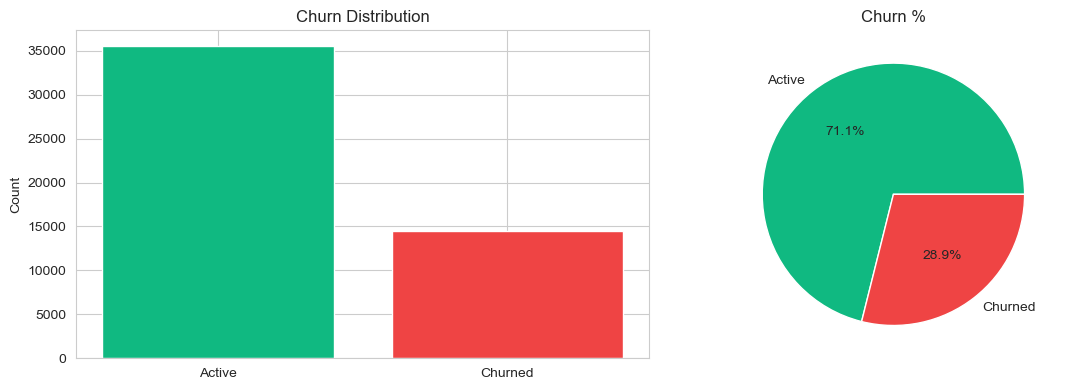

In [19]:
# Visualize
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].bar(['Active', 'Churned'], churn_counts, color=['#10b981', '#ef4444'])
axes[0].set_ylabel('Count')
axes[0].set_title('Churn Distribution')

axes[1].pie(churn_counts, labels=['Active', 'Churned'], autopct='%1.1f%%',
            colors=['#10b981', '#ef4444'])
axes[1].set_title('Churn %')

plt.tight_layout()
plt.show()

 ### Numerical Features Overview

In [20]:
# Basic stats for numerical features
print("Numerical Features Summary:")
df_cleaned[numerical_cols].describe()

Numerical Features Summary:


,Age,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,Total_Purchases,Average_Order_Value,Days_Since_Last_Purchase,Discount_Usage_Rate,Returns_Rate,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000
mean,37.812800,2.984009,11.624660,27.602240,8.717542,57.079973,4.274520,13.111576,123.117330,29.265300,41.871661,6.565861,20.875388,5.679540,2.793580,29.152730,19.294446,2.33618,1440.626292,1958.507600
std,11.535688,2.059105,7.810657,10.497234,3.663996,16.282723,3.060573,7.017312,175.569714,28.866043,20.617080,5.872081,13.890225,2.671844,2.256482,19.308632,8.938875,1.08465,907.249443,1155.938248
min,5.000000,0.100000,0.000000,1.000000,1.000000,0.000000,0.000000,-13.000000,26.380000,0.000000,0.240000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000
25%,30.000000,1.400000,6.000000,20.200000,6.200000,46.400000,2.000000,8.000000,87.050000,9.000000,26.500000,3.100000,10.500000,4.000000,1.000000,15.300000,13.200000,2.00000,789.817500,1164.000000
50%,38.000000,2.500000,11.000000,26.800000,8.400000,58.100000,4.000000,12.000000,112.970000,21.000000,40.200000,5.400000,19.700000,5.000000,2.000000,27.600000,18.600000,2.00000,1243.415000,1896.000000
75%,45.000000,4.000000,17.000000,34.000000,11.000000,68.700000,6.000000,17.000000,144.440000,39.000000,55.560000,8.600000,29.700000,7.000000,4.000000,40.700000,24.600000,3.00000,1874.000000,2664.000000
max,200.000000,10.000000,46.000000,75.600000,24.100000,143.743350,28.000000,128.700000,9666.379178,287.000000,116.640000,99.615734,91.700000,21.000000,21.000000,100.000000,61.900000,5.00000,8987.240000,7197.000000


In [ ]:
# %% [markdown]
# # STEP 3: EXPLORATORY DATA ANALYSIS (EDA)

# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("✓ Ready for EDA")





# %% [markdown]
# ### Correlation Matrix

# %%
# Full correlation matrix
plt.figure(figsize=(16, 12))
corr_matrix = df_cleaned[numerical_cols + ['Churned']].corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

# %% [markdown]
# ### Key Features vs Churn

# %%
# Compare top features between churned and active customers
top_6_features = churn_corr.abs().sort_values(ascending=False).head(6).index

fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.ravel()

for i, feature in enumerate(top_6_features):
    df_cleaned.boxplot(column=feature, by='Churned', ax=axes[i])
    axes[i].set_title(f'{feature}')
    axes[i].set_xlabel('Churned')
    axes[i].set_ylabel(feature)

plt.suptitle('Key Features: Churned vs Active', fontsize=14, y=1.00)
plt.tight_layout()
plt.show()

# %% [markdown]
# ### Categorical Features

# %%
# Check categorical distributions
print("Categorical Features:")
for col in categorical_cols:
    print(f"\n{col}: {df_cleaned[col].nunique()} unique values")
    print(df_cleaned[col].value_counts().head())

# %% [markdown]
# ### Churn Rate by Category

# %%
# Churn rate by key categorical features
for col in categorical_cols[:3]:  # First 3 categorical features
    churn_by_cat = df_cleaned.groupby(col)['Churned'].agg(['sum', 'count', 'mean'])
    churn_by_cat['churn_rate'] = churn_by_cat['mean'] * 100
    churn_by_cat = churn_by_cat.sort_values('churn_rate', ascending=False).head(10)
    
    print(f"\nChurn Rate by {col} (Top 10):")
    print(churn_by_cat[['count', 'churn_rate']])
    
    # Visualize
    plt.figure(figsize=(10, 5))
    plt.barh(range(len(churn_by_cat)), churn_by_cat['churn_rate'], color='coral')
    plt.yticks(range(len(churn_by_cat)), churn_by_cat.index)
    plt.xlabel('Churn Rate (%)')
    plt.title(f'Churn Rate by {col}')
    plt.tight_layout()
    plt.show()

# %% [markdown]
# ### EDA Summary

# %%
print("\n" + "="*60)
print("EDA SUMMARY")
print("="*60)
print(f"""
Target Distribution:
  - Churn rate: {churn_pct[1]:.2f}%
  - Imbalance: {churn_counts[0]/churn_counts[1]:.2f}:1

Top Positive Correlations (features that predict churn):
{churn_corr.head(3).to_dict()}

Top Negative Correlations (features that prevent churn):
{churn_corr.tail(3).to_dict()}

Key Insights:
  - Dataset is imbalanced → will need SMOTE
  - Clear correlation patterns identified
  - Ready for preprocessing and modeling
""")
print("="*60)
print("✅ EDA Complete!")

# %%